## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [53]:
df = pd.read_csv('QueryResults.csv',names=['DATE', 'TAG', 'POSTS'], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [54]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [55]:
df.shape

(2398, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [56]:
df.count

<bound method DataFrame.count of                      DATE       TAG  POSTS
0     2008-07-01 00:00:00        c#      3
1     2008-08-01 00:00:00  assembly      8
2     2008-08-01 00:00:00         c     83
3     2008-08-01 00:00:00        c#    505
4     2008-08-01 00:00:00       c++    164
...                   ...       ...    ...
2393  2022-12-01 00:00:00       php   3236
2394  2022-12-01 00:00:00    python  20581
2395  2022-12-01 00:00:00         r   3774
2396  2022-12-01 00:00:00      ruby    408
2397  2022-12-01 00:00:00     swift   1573

[2398 rows x 3 columns]>

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [57]:
count_tags = df.groupby(['TAG'])['TAG'].count()
print(count_tags)

TAG
assembly      173
c             173
c#            174
c++           173
delphi        173
go            158
java          173
javascript    173
perl          173
php           173
python        173
r             171
ruby          173
swift         165
Name: TAG, dtype: int64


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [58]:
count_months = df.groupby(['TAG']).count()
print(count_months)

            DATE  POSTS
TAG                    
assembly     173    173
c            173    173
c#           174    174
c++          173    173
delphi       173    173
go           158    158
java         173    173
javascript   173    173
perl         173    173
php          173    173
python       173    173
r            171    171
ruby         173    173
swift        165    165


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [59]:
df.DATE = pd.to_datetime(df.DATE)

In [60]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation



In [61]:
reshaped_df = df.pivot(index='DATE', columns='TAG',values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,319.0,1644.0,754.0,104.0,NaN,1130.0,634.0,130.0,476.0,537.0,6.0,287.0,NaN
2008-10-01,15.0,303.0,1988.0,808.0,112.0,NaN,1149.0,723.0,127.0,611.0,507.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1730.0,734.0,141.0,NaN,957.0,580.0,97.0,500.0,450.0,1.0,158.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,177.0,1505.0,6338.0,3241.0,133.0,854.0,6534.0,15570.0,118.0,3768.0,21933.0,4342.0,476.0,1744.0
2022-09-01,191.0,1648.0,5743.0,3087.0,148.0,843.0,6272.0,14310.0,82.0,3391.0,20239.0,4028.0,476.0,1805.0
2022-10-01,242.0,2013.0,5820.0,3220.0,153.0,742.0,6520.0,14125.0,82.0,3387.0,22135.0,4531.0,436.0,1639.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [62]:
reshaped_df.shape 

(174, 14)

In [63]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,319.0,1644.0,754.0,104.0,NaN,1130.0,634.0,130.0,476.0,537.0,6.0,287.0,NaN
2008-10-01,15.0,303.0,1988.0,808.0,112.0,NaN,1149.0,723.0,127.0,611.0,507.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1730.0,734.0,141.0,NaN,957.0,580.0,97.0,500.0,450.0,1.0,158.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [64]:
reshaped_df.count()

TAG
assembly      173
c             173
c#            174
c++           173
delphi        173
go            158
java          173
javascript    173
perl          173
php           173
python        173
r             171
ruby          173
swift         165
dtype: int64

In [65]:
reshaped_df.fillna(0,inplace=True)

In [66]:
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,319.0,1644.0,754.0,104.0,0.0,1130.0,634.0,130.0,476.0,537.0,6.0,287.0,0.0
2008-10-01,15.0,303.0,1988.0,808.0,112.0,0.0,1149.0,723.0,127.0,611.0,507.0,0.0,247.0,0.0
2008-11-01,17.0,259.0,1730.0,734.0,141.0,0.0,957.0,580.0,97.0,500.0,450.0,1.0,158.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,177.0,1505.0,6338.0,3241.0,133.0,854.0,6534.0,15570.0,118.0,3768.0,21933.0,4342.0,476.0,1744.0
2022-09-01,191.0,1648.0,5743.0,3087.0,148.0,843.0,6272.0,14310.0,82.0,3391.0,20239.0,4028.0,476.0,1805.0
2022-10-01,242.0,2013.0,5820.0,3220.0,153.0,742.0,6520.0,14125.0,82.0,3387.0,22135.0,4531.0,436.0,1639.0


In [67]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

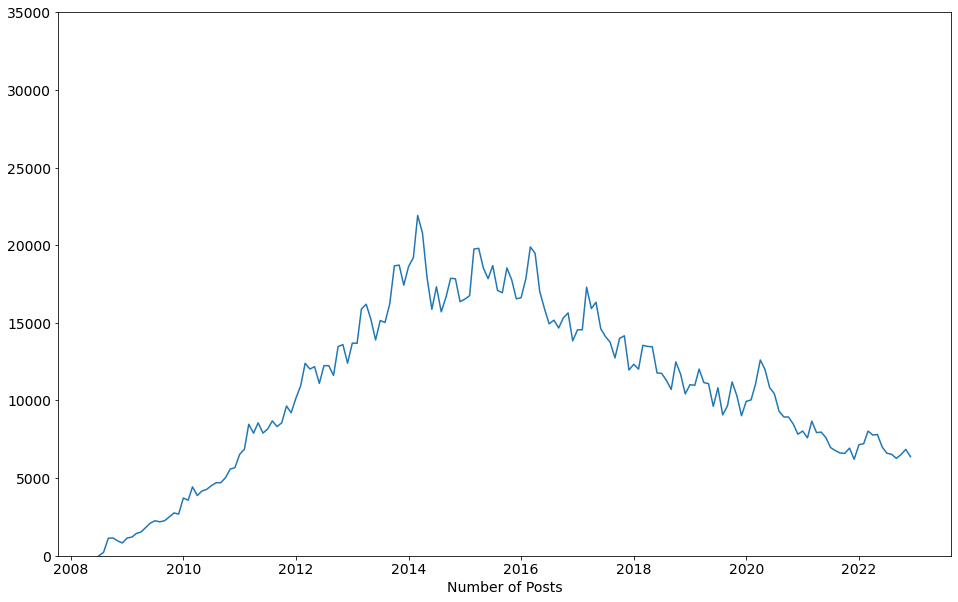

In [68]:
x = reshaped_df.index
y = reshaped_df['java']

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xlabel('Number of Posts',fontsize=14)
plt.ylim(0,35000)

plt.plot(x,y)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

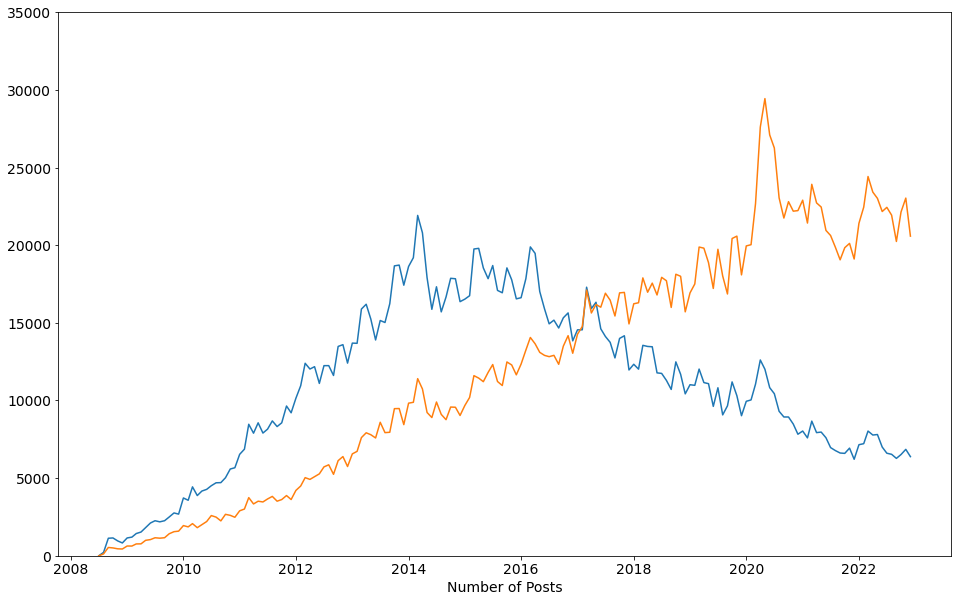

In [69]:
x = reshaped_df.index
y = reshaped_df['java']

x2 = reshaped_df.index
y2 = reshaped_df['python']

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xlabel('Number of Posts',fontsize=14)
plt.ylim(0,35000)

plt.plot(x,y,x2,y2)

**Challenge**: all the programming languages on the same chart.

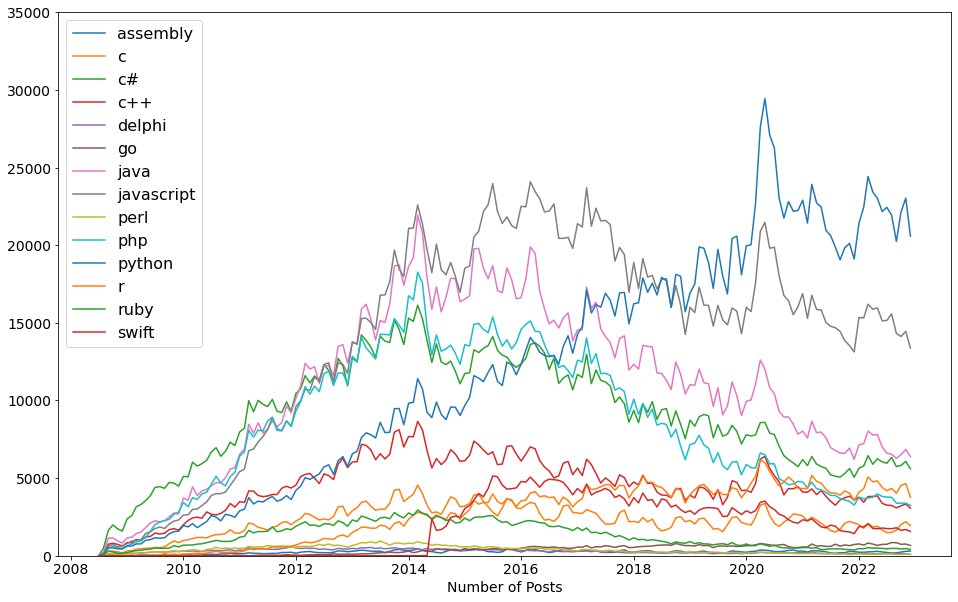

In [70]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date',fontsize=14)
plt.xlabel('Number of Posts',fontsize=14)
plt.ylim(0,35000)

for language in reshaped_df:
  x = reshaped_df.index
  y = reshaped_df[language] 
  plt.plot(x,y,label=language)

plt.legend(fontsize=16)


# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

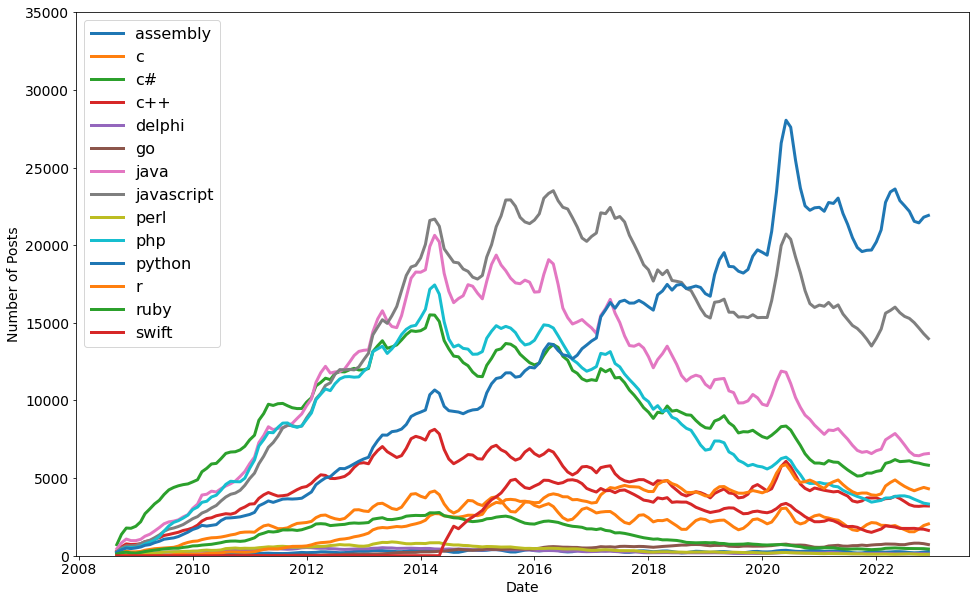

In [71]:
roll_df = reshaped_df.rolling(window=3).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)